# Predicting Sale Price of Bulldozer on Time Series Data
___

## 1. Problem Statement
How might we be able to predict the future sales price of a bulldozer , using the equipment features and previous data of sold bulldozer?

## 2. Data
kaggle :  https://www.kaggle.com/c/bluebook-for-bulldozers/data
udemy : Complete Machine Learning & Data Science Bootcamp 2021 by Daniel Bourke

- Train.csv : training set through end of 2011
- Valid.csv : validation set from Jan 2012 to Apr 2012
- Test.csv : May 2012 to Nov 2012

## 3. Evaluation
RMSLE : Root mean squared log error.

## 4. Features
Kaggle provides a data dictionary detailing all of the features of the dataset on https://docs.google.com/spreadsheets/d/18ly-bLR8sbDJLITkWG7ozKm8l3RyieQ2Fpgix-beSYI/edit?usp=sharing

## 0.0 Importing libraries
___

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
from scipy import stats
sns.set()

# Models / Estimators
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

#Hypertuning Parameters
from sklearn.model_selection import RandomizedSearchCV , GridSearchCV
from sklearn.model_selection import train_test_split, cross_val_score

# Metric Evaluators
from sklearn.metrics import mean_absolute_error , mean_squared_error , r2_score, mean_squared_log_error
from sklearn.metrics import accuracy_score , precision_score , f1_score

In [2]:
df = pd.read_csv('Data/TrainAndValid.csv' , low_memory = False , parse_dates = ['saledate'])

## 1.0 Exploratory Data Analsysis
___

### 1.1 Dataframe Overview
___

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   SalesID                   412698 non-null  int64         
 1   SalePrice                 412698 non-null  float64       
 2   MachineID                 412698 non-null  int64         
 3   ModelID                   412698 non-null  int64         
 4   datasource                412698 non-null  int64         
 5   auctioneerID              392562 non-null  float64       
 6   YearMade                  412698 non-null  int64         
 7   MachineHoursCurrentMeter  147504 non-null  float64       
 8   UsageBand                 73670 non-null   object        
 9   saledate                  412698 non-null  datetime64[ns]
 10  fiModelDesc               412698 non-null  object        
 11  fiBaseModel               412698 non-null  object        
 12  fi

In [4]:
df.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,Low,2006-11-16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,2004-03-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,High,2004-02-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,High,2011-05-19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,Medium,2009-07-23,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


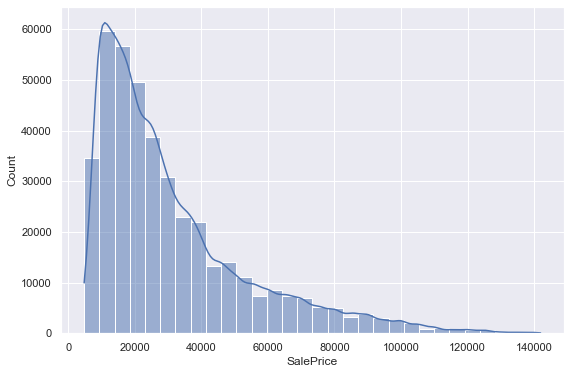

In [5]:
fig, ax = plt.subplots(figsize = (9,6))

x = df['SalePrice']
y = df['saledate']

sns.histplot(data = df,
            x = 'SalePrice',
            bins = 30,
            kde = True);

### 1.2 Checking for Null value
___

In [6]:
df.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
saledate                         0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension     

### 1.3 Checking Data Type Accuracy
___

#### 1.3.1 Parsing Dates

In [7]:
df_bulldozer = pd.read_csv('Data/TrainAndValid.csv',
                          parse_dates = ['saledate'],
                          low_memory = False)

df_bulldozer.saledate[:100]

0    2006-11-16
1    2004-03-26
2    2004-02-26
3    2011-05-19
4    2009-07-23
        ...    
95   2005-12-15
96   2004-01-29
97   2008-09-18
98   2005-11-03
99   2006-06-01
Name: saledate, Length: 100, dtype: datetime64[ns]

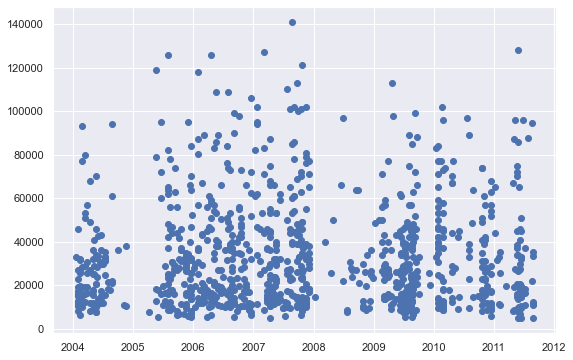

In [8]:
fig , ax = plt.subplots(figsize = (9,6))

y = df_bulldozer['SalePrice'][:1000]
x = df_bulldozer['saledate'][:1000]

ax.scatter(x , y)

In [9]:
df_bulldozer = df_bulldozer.sort_values(by = 'saledate' , ascending = True)
df_bulldozer.head(3)

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
205615,1646770,9500.0,1126363,8434,132,18.0,1974,NaN,NaN,1989-01-17,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN
274835,1821514,14000.0,1194089,10150,132,99.0,1980,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
141296,1505138,50000.0,1473654,4139,132,99.0,1978,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN


#### 1.3.1.1 Add Date Time Parameter for `saledate`

In [10]:
print(f'{df_bulldozer.saledate[:5].dt.year}')
print(f'{df_bulldozer.saledate[:5].dt.day}')
print(f'{df_bulldozer.saledate[:5].dt}')

205615    1989
274835    1989
141296    1989
212552    1989
62755     1989
Name: saledate, dtype: int64
205615    17
274835    31
141296    31
212552    31
62755     31
Name: saledate, dtype: int64


In [11]:
df_bulldozer['SaleYear'] = df_bulldozer.saledate.dt.year
df_bulldozer['SaleMonth'] = df_bulldozer.saledate.dt.month
df_bulldozer['SaleDay'] = df_bulldozer.saledate.dt.day
df_bulldozer['SaleDayofWeek'] = df_bulldozer.saledate.dt.dayofweek
df_bulldozer['SaleDayofYear'] = df_bulldozer.saledate.dt.dayofyear

df_bulldozer = df_bulldozer.drop('saledate' , axis = 1)

df_bulldozer[:10].T

,205615,274835,141296,212552,62755,54653,81383,204924,135376,113390
SalesID,1646770,1821514,1505138,1671174,1329056,1301884,1379228,1645390,1493279,1449549
SalePrice,9500,14000,50000,16000,22000,23500,31000,11750,63000,13000
MachineID,1126363,1194089,1473654,1327630,1336053,1182999,1082797,1527216,1363756,1289412
ModelID,8434,10150,4139,8591,4089,4123,7620,8202,2759,3356
datasource,132,132,132,132,132,132,132,132,132,132
auctioneerID,18,99,99,99,99,99,99,99,99,99
YearMade,1974,1980,1978,1980,1984,1976,1986,1970,1987,1966
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fiModelDesc,TD20,A66,D7G,A62,D3B,D6C,IT12,544,D5HII,12F


#### 1.3.2 Exploring Data in States
___

<AxesSubplot:>

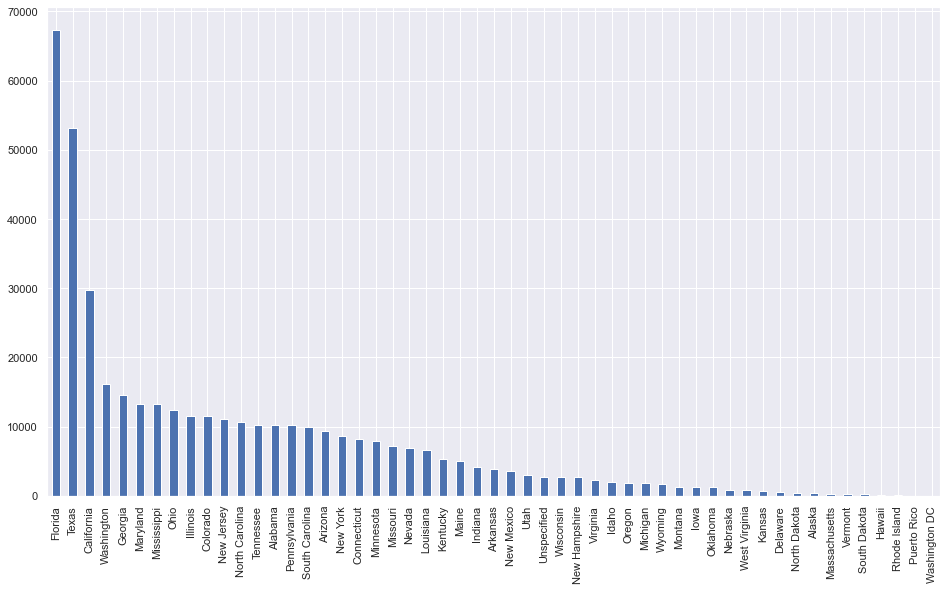

In [12]:
df_bulldozer['state'].value_counts().plot(kind = 'bar' ,
                                          figsize = (16,9))

#### 1.3.3 Converting String into numeric / Category for Data Preprocessing

In [13]:
# Check whether the provided array or dtype is of the string dtype.

pd.api.types.is_string_dtype(df_bulldozer['Differential_Type'])

True

In [14]:
# Checking which columns is string type
for col_name , data in df_bulldozer.items():
    if pd.api.types.is_string_dtype(data):
        print(col_name)

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [15]:
# Changing String / Object into Category

for col_name , data in df_bulldozer.items():
    if pd.api.types.is_string_dtype(data):
        df_bulldozer[col_name] = df_bulldozer[col_name].astype('category')

In [16]:
print(df_bulldozer['state'].cat.codes)

205615    43
274835     8
141296     8
212552     8
62755      8
          ..
410879     4
412476     4
411927     4
407124     4
409203     4
Length: 412698, dtype: int8


#### 1.3.4 Filling in missing numeric number & category value

In [17]:
# Finding column with null value
for col_name , data in df_bulldozer.items():
    if pd.api.types.is_numeric_dtype(data):
        if pd.isnull(data).sum():
            print(col_name)

auctioneerID
MachineHoursCurrentMeter


In [18]:
# fill numeric rows with medians

for col_name , data in df_bulldozer.items():
    if pd.api.types.is_numeric_dtype(data):
        if pd.isnull(data).sum() > 0 :
            df_bulldozer[col_name + '_is_missing'] = pd.isnull(data)
            df_bulldozer[col_name] = data.fillna(value = data.median)

In [19]:
df_bulldozer.isna().sum()

SalesID                                     0
SalePrice                                   0
MachineID                                   0
ModelID                                     0
datasource                                  0
auctioneerID                                0
YearMade                                    0
MachineHoursCurrentMeter                    0
UsageBand                              339028
fiModelDesc                                 0
fiBaseModel                                 0
fiSecondaryDesc                        140727
fiModelSeries                          354031
fiModelDescriptor                      337882
ProductSize                            216605
fiProductClassDesc                          0
state                                       0
ProductGroup                                0
ProductGroupDesc                            0
Drive_System                           305611
Enclosure                                 334
Forks                             

In [20]:
# Finding category column with na value

for col_name , data in df_bulldozer.items():
    if pd.api.types.is_categorical_dtype(data):
        if pd.isna(data).sum() > 0:
            print(col_name)

UsageBand
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [21]:
# Since PD assign -ve 1 to the cat.codes , we will add 1 in subsequent assignment

print(pd.Categorical(df_bulldozer['UsageBand']).codes)
print(pd.Categorical(df_bulldozer['Coupler']).codes)

[-1 -1 -1 ... -1 -1 -1]
[-1  2 -1 ...  2 -1  2]


In [22]:
for col_name , data in df_bulldozer.items():
    if not pd.api.types.is_numeric_dtype(data):
        df_bulldozer[col_name + '_is_missing'] = pd.isnull(data)
        df_bulldozer[col_name] = pd.Categorical(data).codes + 1

In [23]:
df_bulldozer.head().T

,205615,274835,141296,212552,62755
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500,14000,50000,16000,22000
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
...,...,...,...,...,...
Backhoe_Mounting_is_missing,False,True,False,True,False
Blade_Type_is_missing,False,True,False,True,False
Travel_Controls_is_missing,False,True,False,True,False
Differential_Type_is_missing,True,False,True,False,True


In [24]:
df_bulldozer.isna().sum()

SalesID                         0
SalePrice                       0
MachineID                       0
ModelID                         0
datasource                      0
                               ..
Backhoe_Mounting_is_missing     0
Blade_Type_is_missing           0
Travel_Controls_is_missing      0
Differential_Type_is_missing    0
Steering_Controls_is_missing    0
Length: 103, dtype: int64

## 2.0 Data Modelling
___

In [25]:
len(df_bulldozer)

412698

In [26]:
%%time
np.random.seed(42)
model = RandomForestRegressor(n_jobs = -1 , random_state = 42)

X = df_bulldozer.drop('SalePrice' , axis = 1)
y = df_bulldozer['SalePrice']

X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.2)
model.fit(X_train , y_train)

Wall time: 2min 32s


RandomForestRegressor(n_jobs=-1, random_state=42)

In [27]:
%%time

print(f'model score : {model.score(X_train , y_train)}')
print(f'test score : {model.score(X_test , y_test)}')

model score : 0.9867879555923256
test score : 0.9066251693284542
Wall time: 7.58 s


### 2.1 Splitting Data into Train / Valid
___

- Split Training Data from 2012
- Split Validation Data after 2012

In [28]:
df_validation = df_bulldozer[df_bulldozer['SaleYear'] == 2012]
df_train = df_bulldozer[df_bulldozer['SaleYear'] != 2012]

len(df_validation) , len(df_train)

(11573, 401125)

In [29]:
X_valid = df_validation.drop('SalePrice' , axis = 1)
y_valid = df_validation['SalePrice']

X_train = df_train.drop('SalePrice' , axis = 1)
y_train = df_train['SalePrice']

X_valid.shape

(11573, 102)

## 3.0 Modelling Metrics : RMSLE
___

In [30]:
from sklearn.metrics import mean_squared_log_error

def rmsle(y_test , y_preds):

    return np.sqrt(mean_squared_log_error(y_test , y_preds))

def eval_pred(model):
    
    validation_preds = model.predict(X_valid)
    train_preds = model.predict(X_train)
    
    scores = {'MAE_validation' : mean_absolute_error(y_valid , validation_preds),
              'MAE_train' : mean_absolute_error(y_train , train_preds),
              'MSE_validation' : mean_squared_error(y_valid , validation_preds),
              'MSE_train' : mean_squared_error(y_train , train_preds),
              'r2_validation' : r2_score(y_valid , validation_preds),
              'r2_train' : r2_score(y_train , train_preds),
              'RMSLE_validation' : rmsle(y_valid , validation_preds),
              'RMSLE_train' : rmsle(y_train , train_preds),
             }
    return scores

In [31]:
%%time
model = RandomForestRegressor(n_jobs = 1 , 
                              random_state = 42,
                              max_samples = 10000)

model.fit(X_train , y_train)
eval_pred(model)

Wall time: 30.8 s


{'MAE_validation': 7177.30513522855,
 'MAE_train': 5569.966734384545,
 'MSE_validation': 115581715.07874899,
 'MSE_train': 74072362.58815505,
 'r2_validation': 0.8317275337770736,
 'r2_train': 0.8604244776147991,
 'RMSLE_validation': 0.2932676701203707,
 'RMSLE_train': 0.25815692814889707}

## 4.0 Evaluating Estimators & Hyperparameter Tuning
___

The evaluation metric for this project is the RMSLE (Root Mean Squared Error Log Error) Between the actual and predicted auction prices.

**Note** : The goal for most regression evaluation metyrics is to minimize the error. For example, our goal for this project will be toi build a machine learning model which minimises RMSLE.

In [32]:
%%time

#Creating parameter dict for RandomizedSearchCV
rs_rf_param_grid = {'min_samples_split' : np.arange(2 , 20 , 2),
                    'min_samples_leaf' : np.arange(1, 10 , 1),
                    'n_estimators' : np.arange(10 , 100 , 10),
                    'max_features' : [0.5 , 1 , 'sqrt' , 'auto'],
                    'max_depth' : [None , 3 , 5 , 10],
                    'max_samples' : [10000]}

model = RandomForestRegressor(n_jobs = -1,
                              random_state = 42)
# Instantiating RandomizedSearchCV model
rs_model  = RandomizedSearchCV(estimator = model,
                               param_distributions = rs_rf_param_grid,
                               cv = 5,
                               n_iter = 5)

#Fit the RandomizedSearchCV
rs_model.fit(X_train , y_train)
eval_pred(rs_model)

Wall time: 1min 45s


{'MAE_validation': 7278.76643993134,
 'MAE_train': 5665.953766439724,
 'MSE_validation': 121705255.18517698,
 'MSE_train': 77631347.01730578,
 'r2_validation': 0.8228124281738943,
 'r2_train': 0.853718236670097,
 'RMSLE_validation': 0.2942152831547201,
 'RMSLE_train': 0.2607956810137958}

### 3.1 Training model with best params
___

In [33]:
# Finding the best params
rs_model.best_params_

{'n_estimators': 60,
 'min_samples_split': 4,
 'min_samples_leaf': 3,
 'max_samples': 10000,
 'max_features': 'auto',
 'max_depth': None}

In [34]:
%%time

# Ideal Parameters
ideal_model = RandomForestRegressor(n_estimators = 40,
                                    min_samples_leaf = 1,
                                    min_samples_split = 14,
                                    max_features = 0.5,
                                    n_jobs = -1,
                                    max_samples = None,
                                    random_state = 42)
ideal_model.fit(X_train , y_train)
eval_pred(ideal_model)

Wall time: 39.7 s


{'MAE_validation': 6033.683486362387,
 'MAE_train': 2968.4373424129312,
 'MSE_validation': 83549269.9474504,
 'MSE_train': 22061169.204361692,
 'r2_validation': 0.8783627523124771,
 'r2_train': 0.9584298501014805,
 'RMSLE_validation': 0.24862303214648593,
 'RMSLE_train': 0.14500253799740906}

## 4.0 Making Prediction on Test Data
___

In [35]:
df_test = pd.read_csv('Data/Test.csv' ,
                     parse_dates = ['saledate'],
                     low_memory = False)
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12457 entries, 0 to 12456
Data columns (total 52 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   SalesID                   12457 non-null  int64         
 1   MachineID                 12457 non-null  int64         
 2   ModelID                   12457 non-null  int64         
 3   datasource                12457 non-null  int64         
 4   auctioneerID              12457 non-null  int64         
 5   YearMade                  12457 non-null  int64         
 6   MachineHoursCurrentMeter  2129 non-null   float64       
 7   UsageBand                 1834 non-null   object        
 8   saledate                  12457 non-null  datetime64[ns]
 9   fiModelDesc               12457 non-null  object        
 10  fiBaseModel               12457 non-null  object        
 11  fiSecondaryDesc           8482 non-null   object        
 12  fiModelSeries     

In [36]:
df_test.isna().sum()

SalesID                         0
MachineID                       0
ModelID                         0
datasource                      0
auctioneerID                    0
YearMade                        0
MachineHoursCurrentMeter    10328
UsageBand                   10623
saledate                        0
fiModelDesc                     0
fiBaseModel                     0
fiSecondaryDesc              3975
fiModelSeries               10451
fiModelDescriptor            9433
ProductSize                  6409
fiProductClassDesc              0
state                           0
ProductGroup                    0
ProductGroupDesc                0
Drive_System                 9698
Enclosure                       2
Forks                        6149
Pad_Type                    10349
Ride_Control                 8216
Stick                       10349
Transmission                 7639
Turbocharged                10349
Blade_Extension             11806
Blade_Width                 11806
Enclosure_Type

### 4.1 Preprocessing Test Data
___

In [37]:
"""
Perform the same preprocessing on train data on test data

1. Change the Date Format
2. Fill nuermic rows with median
3. Convert object into Category and fill in with numeric number

"""

def preprocessing_data(df):
    # Change the Date Format
    df['SaleYear'] = df.saledate.dt.year
    df['SaleMonth'] = df.saledate.dt.month
    df['SaleDay'] = df.saledate.dt.day
    df['SaleDayofWeek'] = df.saledate.dt.dayofweek
    df['SaleDayofYear'] = df.saledate.dt.dayofyear
    df.drop('saledate' , axis = 1 , inplace = True)
    
    # Fill numeric rows with median
    for col_name , data in df.items():
        if pd.api.types.is_numeric_dtype(data):
            if pd.isnull(data).sum():
                df[col_name + '_is_missing'] = pd.isnull(data)
                df[col_name] = data.fillna(value = data.median())
    
    # Convert object into Category and fill in with numeric number
        if not pd.api.types.is_numeric_dtype(data):
            df[col_name + '_is_missing'] = pd.isnull(data)
            df[col_name] = pd.Categorical(data).codes + 1
    
    return df

In [38]:
df_test = preprocessing_data(df_test)

In [39]:
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
0,1227829,1006309,3168,121,3,1999,3688.0,2,499,180,...,True,True,True,True,True,True,True,True,True,True
1,1227844,1022817,7271,121,3,1000,28555.0,1,831,292,...,True,True,True,True,True,True,True,True,False,False
2,1227847,1031560,22805,121,3,2004,6038.0,3,1177,404,...,False,False,False,False,False,True,True,True,True,True
3,1227848,56204,1269,121,3,2006,8940.0,1,287,113,...,False,False,False,False,False,True,True,True,True,True
4,1227863,1053887,22312,121,3,2005,2286.0,2,566,196,...,True,True,True,True,True,False,False,False,True,True


In [40]:
# The shape of df_test and X_train is different

set(X_train.columns) - set(df_test.columns)

{'auctioneerID_is_missing'}

In [41]:
# Will add 'auctioneerID_is_missing' into df_test 

df_test['auctioneerID_is_missing'] = False

In [42]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12457 entries, 0 to 12456
Columns: 102 entries, SalesID to auctioneerID_is_missing
dtypes: bool(46), float64(1), int16(2), int64(11), int8(42)
memory usage: 2.2 MB


In [43]:
test_preds = ideal_model.predict(df_test)

## 5.0 Exporting to csv
___

In [50]:
df_preds = pd.DataFrame()
df_preds['SalesID'] = df_test['SalesID']
df_preds['SalesPrice'] = test_preds
df_preds.head()

,SalesID,SalesPrice
0,1227829,21060.375798
1,1227844,19562.604789
2,1227847,49342.914766
3,1227848,59965.980798
4,1227863,44760.000646


In [45]:
df_preds.to_csv('Data/test_predictions.csv' , index = False)

## 6.0 Feature Importance
___

In [46]:
ideal_model.feature_importances_

array([3.46548351e-02, 1.87312120e-02, 4.43525199e-02, 1.76905843e-03,
       3.98371833e-03, 1.97022952e-01, 4.07225397e-03, 1.17992359e-03,
       4.85757216e-02, 3.38779401e-02, 6.61534931e-02, 4.68915462e-03,
       1.42196885e-02, 1.49553467e-01, 4.17976658e-02, 5.98267450e-03,
       2.74934254e-03, 4.09798366e-03, 3.56204523e-03, 7.88564567e-02,
       7.21859386e-04, 5.43415758e-05, 1.11675582e-03, 1.53941326e-04,
       9.39582310e-04, 2.86684390e-05, 2.01194275e-03, 8.15305139e-03,
       2.64470069e-03, 2.13268730e-03, 3.89339663e-03, 3.37238128e-03,
       3.83906651e-03, 2.74851977e-04, 4.17932188e-03, 7.49812671e-03,
       8.45509001e-04, 9.52059731e-03, 6.97443860e-04, 1.77363665e-03,
       8.29958477e-04, 9.11553753e-04, 5.56919066e-03, 6.10946325e-04,
       2.99431697e-04, 3.49549667e-04, 3.70307341e-04, 1.69618870e-03,
       7.97446611e-04, 2.67048680e-04, 1.60771081e-04, 7.19846947e-02,
       3.79520422e-03, 5.72034496e-03, 2.91176581e-03, 9.89896403e-03,
      

In [47]:
X_train.columns

Index(['SalesID', 'MachineID', 'ModelID', 'datasource', 'auctioneerID',
       'YearMade', 'MachineHoursCurrentMeter', 'UsageBand', 'fiModelDesc',
       'fiBaseModel',
       ...
       'Undercarriage_Pad_Width_is_missing', 'Stick_Length_is_missing',
       'Thumb_is_missing', 'Pattern_Changer_is_missing',
       'Grouser_Type_is_missing', 'Backhoe_Mounting_is_missing',
       'Blade_Type_is_missing', 'Travel_Controls_is_missing',
       'Differential_Type_is_missing', 'Steering_Controls_is_missing'],
      dtype='object', length=102)

In [62]:
# Creating a df for features vs features values

df_features = pd.DataFrame()
df_features['features'] = X_train.columns
df_features['feature_values'] = ideal_model.feature_importances_
df_features.sort_values(by = 'feature_values' , inplace = True , ascending = False)
df_features.reset_index(drop = True , inplace = True)
df_features

,features,feature_values
0,YearMade,0.197023
1,ProductSize,0.149553
2,Enclosure,0.078856
3,SaleYear,0.071985
4,fiSecondaryDesc,0.066153
...,...,...
97,ProductGroup_is_missing,0.000000
98,fiModelDesc_is_missing,0.000000
99,ProductGroupDesc_is_missing,0.000000
100,auctioneerID_is_missing,0.000000


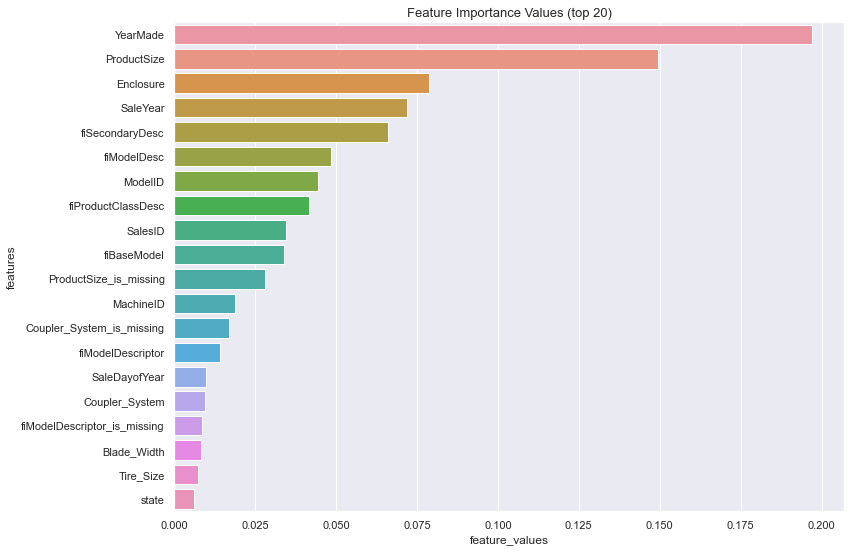

In [70]:
plt.figure(figsize = (12,9))

sns.barplot(y = 'features',
            x = 'feature_values',
            data = df_features[:20])
plt.title('Feature Importance Values (top 20)' , fontsize = 13)
plt.show()